# Actividad 4: Completar Notebook Vinos

---

***Estudiante:  Jessica Brise√±o                Fecha: Abril 2024***

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versi√≥n reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una rese√±a en ingl√©s sobre una gran cantidad de vinos del mundo.

### __Descripci√≥n de los campos__

 - **country**: El pa√≠s de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensaci√≥n, etc. del vino.
 - **designation**: La denominaci√≥n. El vi√±edo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calific√≥ al vino en una escala del 1 al 100 (aunque dicen que solo publican rese√±as de vinos con una puntuaci√≥n> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el √°rea de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones m√°s espec√≠ficas, especificadas dentro de un √°rea de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que prob√≥ y revis√≥ el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que prob√≥ y revis√≥ el vino.
 - **title**: el t√≠tulo de la rese√±a de vinos, que a menudo contiene la cosecha si est√° interesado en extraer esa caracter√≠stica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  42.8M      0 --:--:-- --:--:-- --:--:-- 42.8M


In [ ]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   

    designation  points  price           province           region_1  \
0  Vulk√† Bianco      87    NaN  Sicily & Sardinia               Etna   
1      Avidagos      87   15.0              Douro                NaN   
2           NaN      87   14.0             Oregon  Willamette Valley   

            region_2    taster_name taster_twitter_handle  \
0                NaN  Kerin O‚ÄôKeefe          @kerinokeefe   
1                NaN     Roger Voss            @vossroger   
2  Willamette Valley   Paul Gregutt           @paulgwine¬†   

                                           title         variety  \
0              Nicosia 2013 Vulk√† Bianco  (Etna)     White Blend   
1  Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2  Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm

In [ ]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

country                                        description   designation  \
0     Italy  Aromas include tropical fruit, broom, brimston...  Vulk√† Bianco   
1  Portugal  This is ripe and fruity, a wine that is smooth...      Avidagos   
2        US  Tart and snappy, the flavors of lime flesh and...           NaN   

   points  price           province           region_1           region_2  \
0      87    NaN  Sicily & Sardinia               Etna                NaN   
1      87   15.0              Douro                NaN                NaN   
2      87   14.0             Oregon  Willamette Valley  Willamette Valley   

     taster_name taster_twitter_handle  \
0  Kerin O‚ÄôKeefe          @kerinokeefe   
1     Roger Voss            @vossroger   
2   Paul Gregutt           @paulgwine¬†   

                                           title         variety  \
0              Nicosia 2013 Vulk√† Bianco  (Etna)     White Blend   
1  Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2  Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm

### __Veamos cuantas rese√±as de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las rese√±as de vinos mexicanos.
- Qu√©date **s√≥lo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el √≠ndice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [ ]:
"""
SECUENCIA:
1. Ubicar todos los registros de M√©xico usando indexaci√≥n booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el √≠ndice usando reset_index()
4. Tirar (drop) la nueva columna index
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de M√©xico usando indexaci√≥n booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el √≠ndice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index
vinosMX = vinosMX.drop('index',axis=1)
vinosMX.head(5)

country       winery             variety  \
0  Mexico   L.A. Cetto            Nebbiolo   
1  Mexico  Monte Xanic     Sauvignon Blanc   
2  Mexico   L.A. Cetto  Cabernet Sauvignon   
3  Mexico  Cava Aragon            Nebbiolo   
4  Mexico   L.A. Cetto        Petite Sirah   

                                         description  points  price  
0  The color is appropriately light, the aromas a...      88   18.0  
1  Sauvignon Blanc is, in general, one of Baja's ...      87   15.0  
2  Aromas of mature Cabernet: cassis, tobacco lea...      87   18.0  
3  While this is fiery on the nose, you also get ...      88   27.0  
4  Dark and earthy, slightly pruny and alcoholic,...      83    8.0

### __Veamos cuantas rese√±as de vinos por pa√≠s tenemos.__

#### &#9758; Muestra en una gr√°fica de barras la distribuci√≥n del n√∫mero de rese√±as por pa√≠s (_top 10_).

#### Puedes auxiliarte con alguna de estos m√©todos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

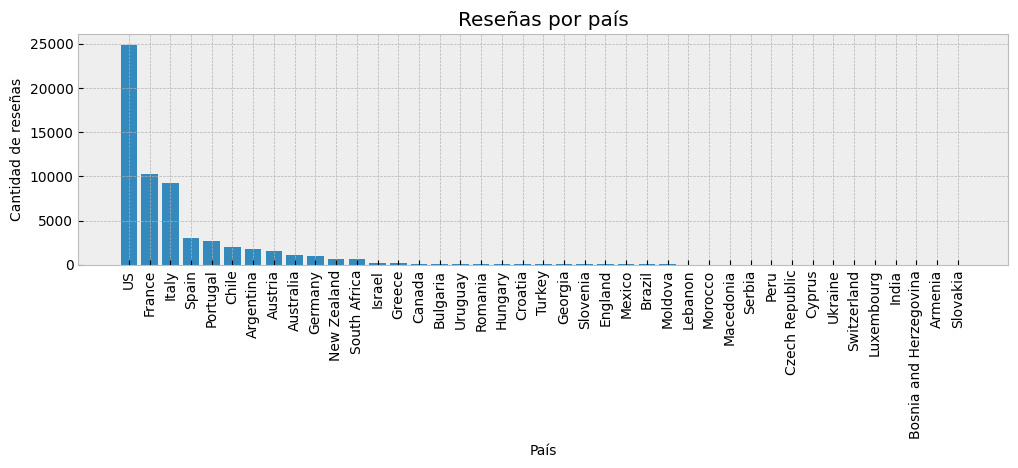

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt        # Importar la libreria

# Gu√≠a de estilos:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

conteo = df["country"].value_counts()
x=conteo.index
y=conteo.values

plt.figure(figsize=(12,3))
plt.style.use("bmh")
plt.bar(x,y)                         # Crear gr√°fico

plt.xlabel("Pa√≠s", fontsize=10)      # T√≠tulo eje x (rotation='vertical')
plt.ylabel("Cantidad de rese√±as", fontsize=10)    # T√≠tulo eje y
plt.title("Rese√±as por pa√≠s")

#sns.barplot(x:x[:10],y:y[:10])

plt.xticks(x, rotation='vertical')
plt.rc('font', size=8,)
#plt.rc('axes', titlesize=.1)
#plt.margins(0.2)
#plt.subplots_adjust(bottom=0.15)

plt.show()
plt.close('all')                         # Cerrar ventana


In [ ]:
conteos=df.country.value_counts()
x = conteos.index
y = conteos.values
#x[:10]
conteos.index[:10]

Index(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina',
       'Austria', 'Australia', 'Germany'],
      dtype='object', name='country')

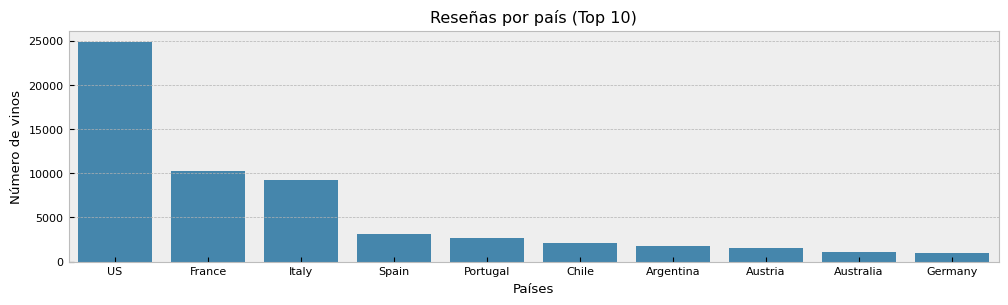

In [ ]:
###################################### Gr√°fica de rese√±as por pa√≠s    (Opci√≥n 1)

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ubicar el nombre de la columna de pa√≠s
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores √∫nicos sobre esta Serie
# 4. X en la gr√°fica de barras son los pa√≠ses (√≠ndice de la Serie)
# 5. Y en la gr√°fica de barras son los conteos por pa√≠s (values de la Serie)
#6. Usar Seaborn para graficar el diagrama de barras
#7. Rotular la gr√°fica y los ejes

conteos=df.country.value_counts()
x = conteos.index
y = conteos.values

plt.figure(figsize=(12,3))
sns.barplot(x=conteos.index[:10],y=conteos.values[:10])
# En una sola l√≠nea:
#sns.barplot(df.country.value_counts().index[:10], df.country.value_counts().values[:10])
plt.xlabel("Pa√≠ses")
plt.ylabel("N√∫mero de vinos")
plt.title("Rese√±as por pa√≠s (Top 10)")

plt.show()

Text(0.5, 1.0, 'Rese√±as por pa√≠s (Top 10)')

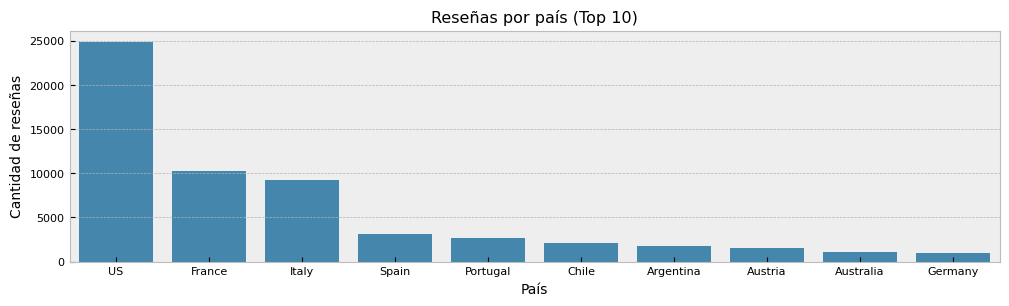

In [ ]:
###################################### Gr√°fica de rese√±as por pa√≠s    (Opci√≥n 2)

plt.figure(figsize=(12,3))
plt.style.use("bmh")
sns.barplot(x=x[:10],y=y[:10])                      # Crear gr√°fico

plt.xlabel("Pa√≠s", fontsize=10)                     # T√≠tulo eje x (rotation='vertical')
plt.ylabel("Cantidad de rese√±as", fontsize=10)      # T√≠tulo eje y
plt.title("Rese√±as por pa√≠s (Top 10)")              # T√≠tulo gr√°fica

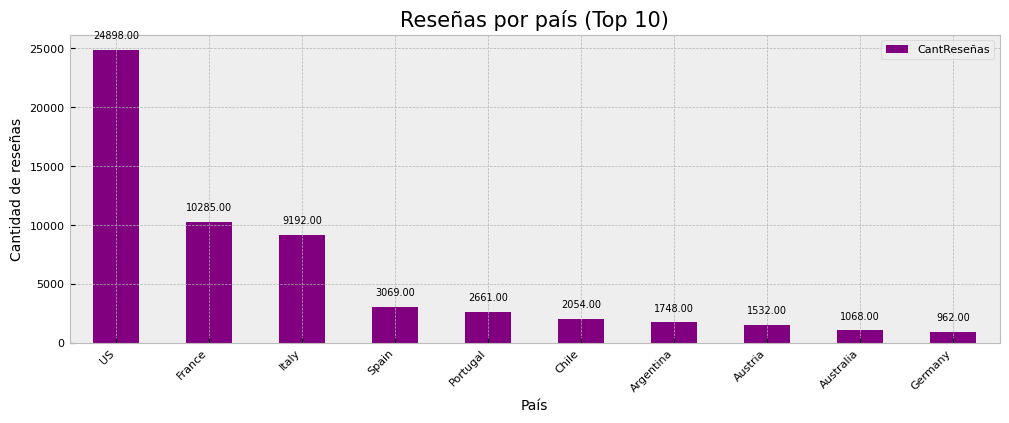

In [ ]:
###################################### Gr√°fica de rese√±as por pa√≠s    (Opci√≥n 3)

import pandas as pd
df_Anotaciones = pd.DataFrame((zip(x[:10],y[:10])), columns = ['pais','CantRese√±as'])

ax=df_Anotaciones.plot(x='pais', y='CantRese√±as',kind="bar", figsize=(12, 4),
                          color="purple")

plt.title("Rese√±as por pa√≠s (Top 10)", fontsize=15)              # T√≠tulo gr√°fica
plt.xlabel("Pa√≠s", fontsize=10)                     # T√≠tulo eje x (rotation='vertical')
plt.ylabel("Cantidad de rese√±as", fontsize=10)      # T√≠tulo eje y
plt.xticks(rotation=45, ha="right")

# Recorremos cada rect√°ngulo

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=7, color='black',\
                xytext=(0, 10),\
                textcoords='offset points')

### __Veamos ahora cu√°l es el precio promedio por cada pa√≠s.__

#### &#9758; Muestra en una gr√°fica de barras el precio promedio por pa√≠s, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¬øCu√°l ser√≠a el precio promedio por variedad?

üôÇ __Escribe la secuencia de pasos que tendr√≠as que realizar.__

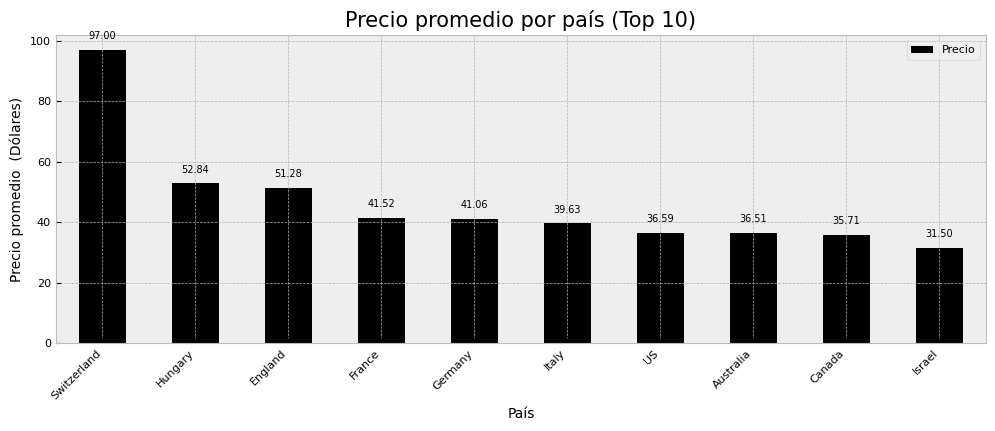

In [ ]:
################################################################################
#  Gr√°fica de barras el precio promedio por pa√≠s, en orden descendente (top 10)

# 1. Crear un df, agrupando por pa√≠s-precio y calcular la media
# 2. Ordenar el df
# 3. Generar un nuevo df para Anotaciones
# 4. Generar la gr√°fica con anotaciones

promedios = df.groupby("country")["price"].mean()
promedios=promedios.sort_values(ascending=False)

#df_paises = df[df["country"]=="Switzerland"]   #Para comprobar
#df_paises.describe()

x = promedios.index; y = promedios.values

import pandas as pd
df_Anotaciones = pd.DataFrame((zip(x[:10],y[:10])), columns = ['pais','Precio'])

ax=df_Anotaciones.plot(x='pais', y='Precio',kind="bar", figsize=(12, 4),
                       color="black")

plt.title("Precio promedio por pa√≠s (Top 10)", fontsize=15)              # T√≠tulo gr√°fica
plt.xlabel("Pa√≠s", fontsize=10)                     # T√≠tulo eje x (rotation='vertical')
plt.ylabel("Precio promedio  (D√≥lares)", fontsize=10)      # T√≠tulo eje y
plt.xticks(rotation=45, ha="right")

# Recorremos cada rect√°ngulo

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=7, color='black',\
                xytext=(0, 10),\
                textcoords='offset points')

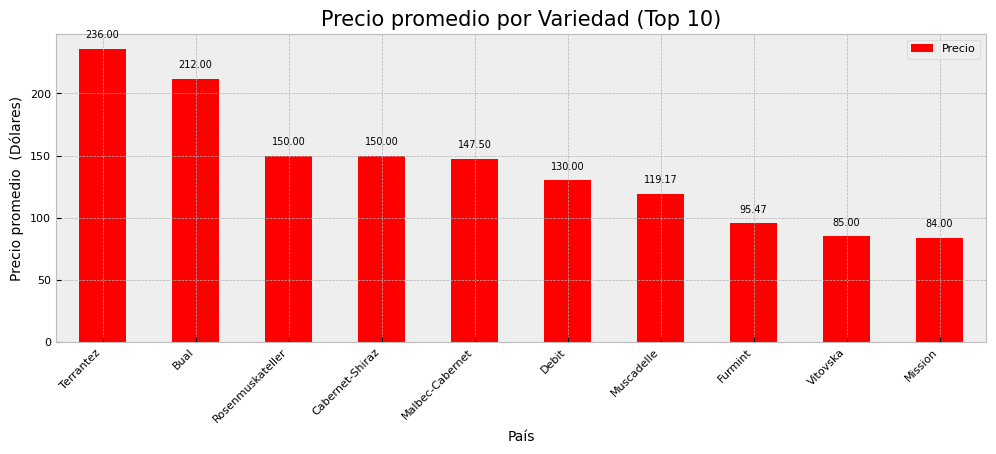

In [ ]:
################################################################################
# Gr√°fica de barras el precio promedio por variedad, en orden descendente (top 10)
# 1. Crear un df, agrupando por pa√≠s-precio y calcular la media
# 2. Ordenar el df
# 3. Generar un nuevo df para Anotaciones
# 4. Generar la gr√°fica con anotaciones

promediosVar = df.groupby("variety")["price"].mean()
promediosVar=promediosVar.sort_values(ascending=False)

x = promediosVar.index; y = promediosVar.values

import pandas as pd
df_AnotacionesVar = pd.DataFrame((zip(x[:10],y[:10])), columns = ['pais','Precio'])

ax=df_AnotacionesVar.plot(x='pais', y='Precio',kind="bar", figsize=(12, 4),
                          color="red")

plt.title("Precio promedio por Variedad (Top 10)", fontsize=15)              # T√≠tulo gr√°fica
plt.xlabel("Pa√≠s", fontsize=10)                     # T√≠tulo eje x (rotation='vertical')
plt.ylabel("Precio promedio  (D√≥lares)", fontsize=10)      # T√≠tulo eje y
plt.xticks(rotation=45, ha="right")

# Recorremos cada rect√°ngulo

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=7, color='black',\
                xytext=(0, 10),\
                textcoords='offset points')

#### Agregando anotaciones a nuestros gr√°ficos

Es posible agregar informaci√≥n a nuestros gr√°ficos, en forma de texto, o dibujos (e.g. flechas, l√≠neas, c√≠rculos, etc.). Para ello, se utiliza la anotaci√≥n (annotate) de ejes (axes). Detallar aqu√≠ c√≥mo funciona nos llevar√≠a mucho tiempo. Puedes consultar la documentaci√≥n en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

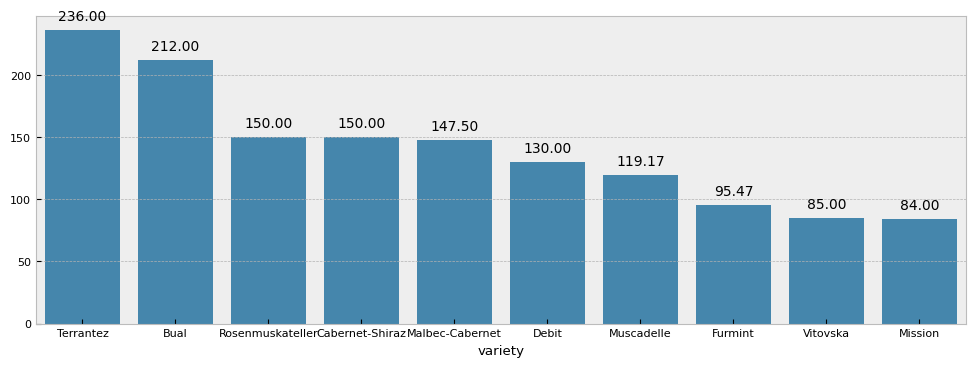

In [ ]:
#Definimos el tama√±o del canvas
plt.figure(figsize=(12,4))

# la variable "ax" (axes) contiene la informaci√≥n  del gr√°fico de barras.
# En particular, contiene todo lo relativo a los parches (rect√°ngulos) del barplot.
ax = sns.barplot(x=x[:10], y=y[:10])

# Recorremos cada rect√°ngulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=10, color='black',\
                xytext=(0, 10),\
                textcoords='offset points')
plt.show()

### __Ahora queremos darnos una idea de cu√°les podr√≠an ser los pa√≠ses cuyos vinos tienen una mejor raz√≥n calidad-precio en promedio.__

#### &#9758; Muestra en una gr√°fica de barras la raz√≥n puntos/precio promedio por pa√≠s, en orden descendente (_top 10_). Muestra los valores de la raz√≥n sobre cada barra.

‚úã __Recuerda que si divides entre 0 o Nan obtendr√°s inf o nan__

üôÇ __Escribe la secuencia de pasos que tendr√≠as que realizar.__

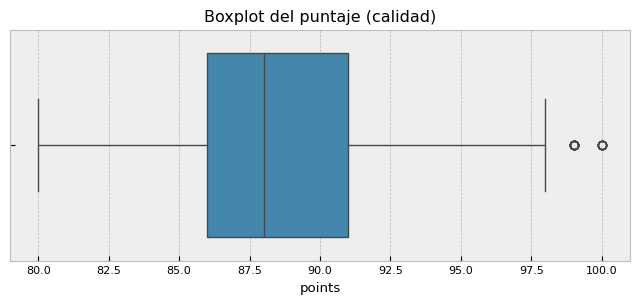

In [ ]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

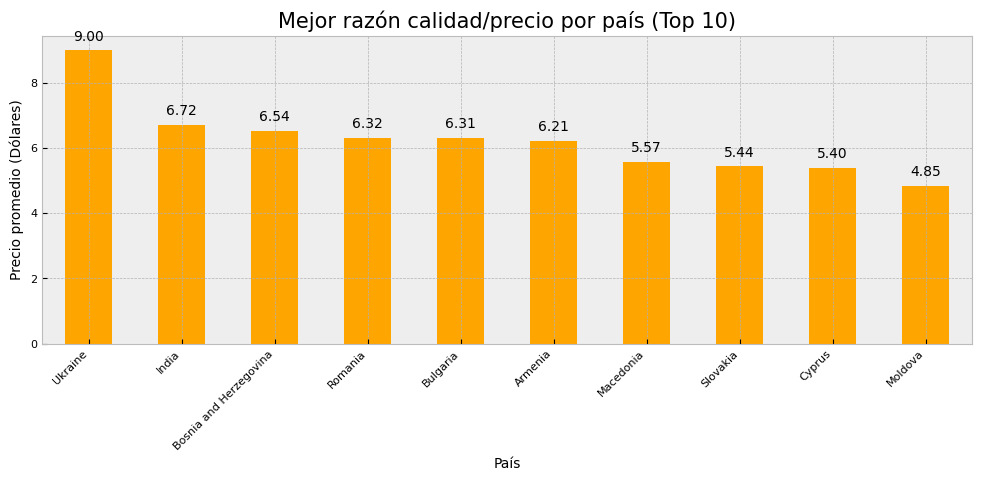

In [ ]:
################################################################################
# Gr√°fica de barras de la raz√≥n (calidad/precio) en orden descendente (top 10)

#1. Agrupa los datos por pais y calcula la raz√≥n calidad/precio
#2. Ordena las razones puntos/precio de forma ascendente
#3. Selecciona los 10 paises con las mejores razones
#4. Grafica las 10 mejores raices

import matplotlib.pyplot as plt

promedios=df.groupby("country").apply(lambda x: x["points"].mean() / x["price"].mean())
promedios=promedios.sort_values(ascending=False)
top_10_mejores_raices=promedios.head(10)

ax=top_10_mejores_raices.plot(kind="bar", figsize=(12, 4),
                          color="orange")
plt.title("Mejor raz√≥n calidad/precio por pa√≠s (Top 10)", fontsize=15)
plt.xlabel("Pa√≠s", fontsize=10)      # T√≠tulo eje x (rotation='vertical')
plt.ylabel("Precio promedio (D√≥lares)", fontsize=10)    # T√≠tulo eje y
plt.xticks(rotation=45, ha="right")

# Recorremos cada rect√°ngulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=10, color='black',\
                xytext=(0, 10),\
                textcoords='offset points')


### __¬øQu√© vinos tienen la mejor puntuaci√≥n y a qu√© pa√≠ses pertenecen?__

#### &#9758; Muestra en una gr√°fica de pastel la proporci√≥n de los pa√≠ses que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

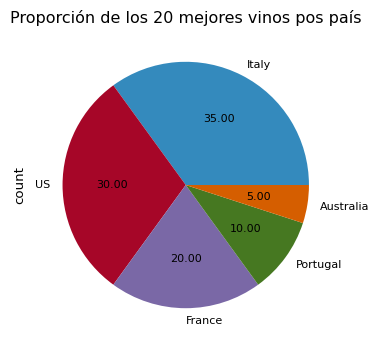

In [ ]:
################################################################################
# Gr√°fica de barras de los vinos con mejor puntuaci√≥n y a que paises pertenecen en orden descendente (top 10)

#1. Generar un df con puntuaci√≥n y paises
#2. Ordena el df mejores razones
#4. Grafica las 10 mejores raices

import matplotlib.pyplot as plt

df_MejoresPunt=df[["country","points"]]

df_MejoresPunt=df_MejoresPunt.sort_values(by="points", ascending=False)
df_MejoresPunt=df_MejoresPunt.head(20)

df_MejoresPunt=df_MejoresPunt["country"].value_counts()


df_MejoresPunt.plot(kind='pie', autopct='%.2f',figsize=(4, 4),
                    title='Proporci√≥n de los 20 mejores vinos pos pa√≠s')

plt.show()

In [ ]:
#TU CODIGO


### __¬øCu√°les son las 10 variedades de uva m√°s abundantes y en qu√© proporci√≥n?__

#### &#9758; Da una soluci√≥n utilizando s√≥lo dos l√≠neas de c√≥digo

In [ ]:
#TU CODIGO
variedadesUva =df["variety"].value_counts().head(10)/len(df)
variedadesUva

variety
Pinot Noir                  0.101608
Chardonnay                  0.089057
Cabernet Sauvignon          0.072556
Red Blend                   0.069656
Bordeaux-style Red Blend    0.052738
Riesling                    0.040103
Sauvignon Blanc             0.039070
Syrah                       0.031669
Ros√©                        0.026502
Merlot                      0.023535
Name: count, dtype: float64

### __¬øCu√°les son las 20 bodegas m√°s mencionadas y en qu√© proporci√≥n?__

#### &#9758; Da una soluci√≥n utilizando s√≥lo dos l√≠neas de c√≥digo

In [ ]:
#TU CODIGO
bodegas = df["winery"].value_counts().head(20)/len(df)
bodegas

winery
Georges Duboeuf               0.001817
Wines & Winemakers            0.001783
Testarossa                    0.001617
Louis Latour                  0.001450
Chateau Ste. Michelle         0.001433
Williams Selyem               0.001433
DFJ Vinhos                    0.001433
Concha y Toro                 0.001300
Gary Farrell                  0.001233
Lynmar                        0.001200
Kendall-Jackson               0.001133
Robert Mondavi                0.001083
Columbia Crest                0.000950
Trapiche                      0.000950
Undurraga                     0.000933
Siduri                        0.000917
Albert Bichot                 0.000917
Jean-Luc and Paul Aegerter    0.000883
Casa Santos Lima              0.000883
Rodney Strong                 0.000883
Name: count, dtype: float64

### __Vamos ahora a construir una nueva tabla de informaci√≥n__

#### &#9758; Construye una tabla que muestre pa√≠s, variedad de uva, bodega, y valores de puntuaci√≥n y precio.
- Considera las 10 variedades de uva y las 20 bodegas m√°s importantes.
- Haz una tabla con estos datos y s√≥lo los valores de pa√≠s, bodega, variedad, puntuaci√≥n y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que √©ste incluya su pa√≠s de origen.
- Ordena los datos por nombre de pa√≠s, variedad y bodega (orden ascendente).

In [ ]:
# 1. Filtrar el df original
# 2. Seleccionar s√≥lo las col de interes
# 3. Calcular el valor de puntos/precio
# 4. Cambiar el nombre de la bodega para que incluya su pa√≠s de origen

variedades_top=df["variety"].value_counts().head(10).index
bodegas_top=df["winery"].value_counts().head(20).index
df_filtrado=df[df["variety"].isin(variedades_top) & df["winery"].isin(bodegas_top)]



tabla=df_filtrado[["country","variety","winery","points","price"]]

tabla["Puntos_precio"]=tabla["points"]/tabla["price"]

tabla["winery"]=tabla["country"]+"-"+tabla["winery"]

tabla=tabla.sort_values(by=["country","variety","winery"])   #,ascending=[True,True,True]).head(5)

tabla.reset_index(drop=True, inplace=True)

tabla

<ipython-input-113-9490aa29662a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla["Puntos_precio"]=tabla["points"]/tabla["price"]
<ipython-input-113-9490aa29662a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla["winery"]=tabla["country"]+"-"+tabla["winery"]


country             variety              winery  points  price  \
0    Argentina  Cabernet Sauvignon  Argentina-Trapiche      84   10.0   
1    Argentina  Cabernet Sauvignon  Argentina-Trapiche      88   15.0   
2    Argentina  Cabernet Sauvignon  Argentina-Trapiche      90   15.0   
3    Argentina  Cabernet Sauvignon  Argentina-Trapiche      88   10.0   
4    Argentina  Cabernet Sauvignon  Argentina-Trapiche      91   30.0   
..         ...                 ...                 ...     ...    ...   
994         US               Syrah       US-Testarossa      85   49.0   
995         US               Syrah       US-Testarossa      91   54.0   
996         US               Syrah       US-Testarossa      94   54.0   
997         US               Syrah       US-Testarossa      94   54.0   
998        NaN     Sauvignon Blanc                 NaN      87   12.0   

     Puntos_precio  
0         8.400000  
1         5.866667  
2         6.000000  
3         8.800000  
4         3.033333  
..             ...  
994       1.734694  
995       1.685185  
996       1.740741  
997       1.740741  
998       7.250000  

[999 rows x 6 columns]

#### &#9758; Observa la relaci√≥n puntos-precio por pa√≠s

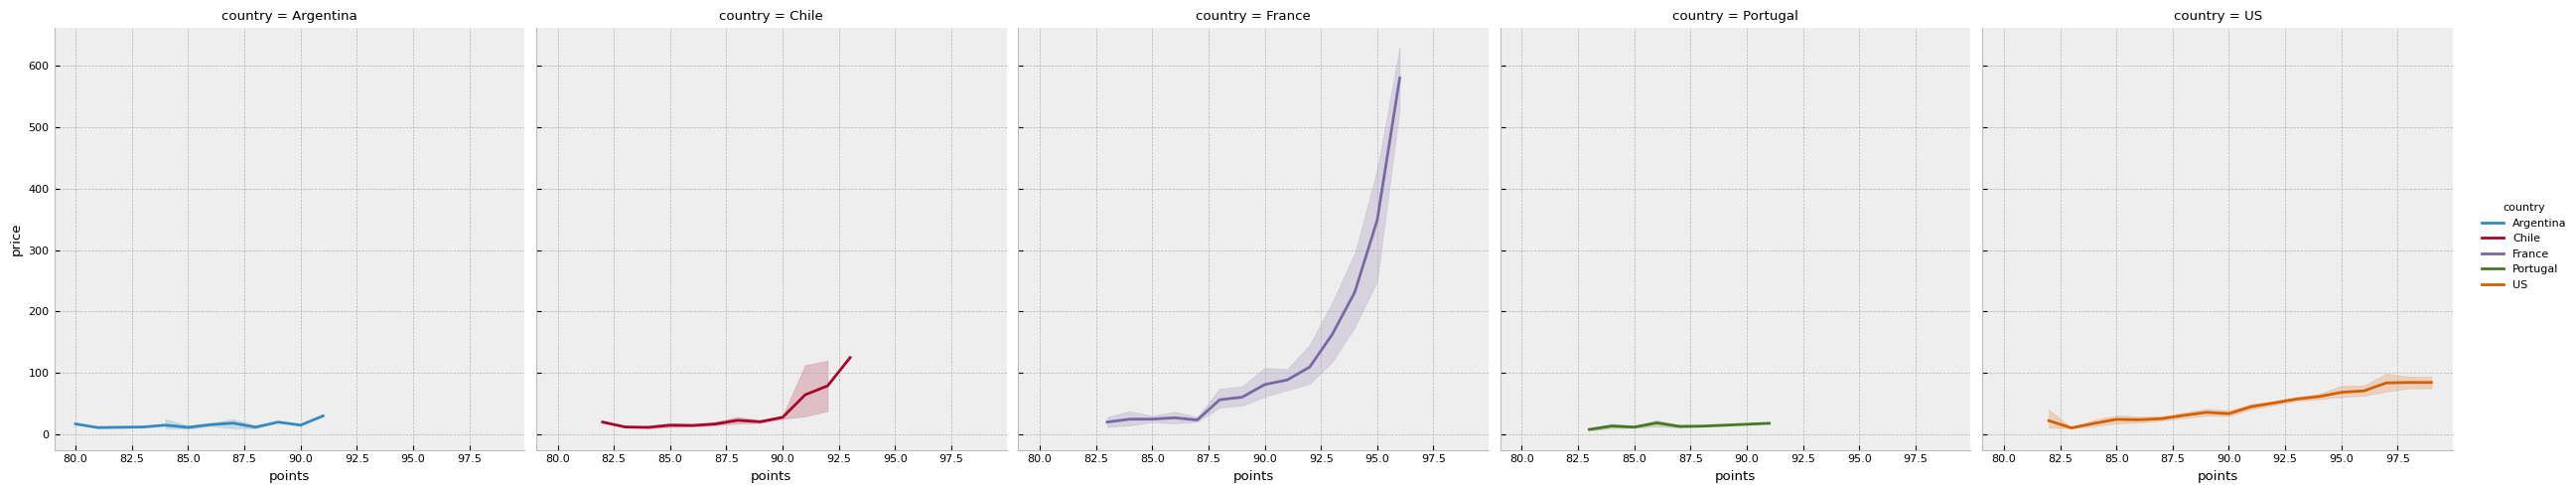

In [ ]:
import seaborn as sns
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=tabla)

#### &#9758; Observa las distribuciones por pares en funci√≥n de la variedad de uva.

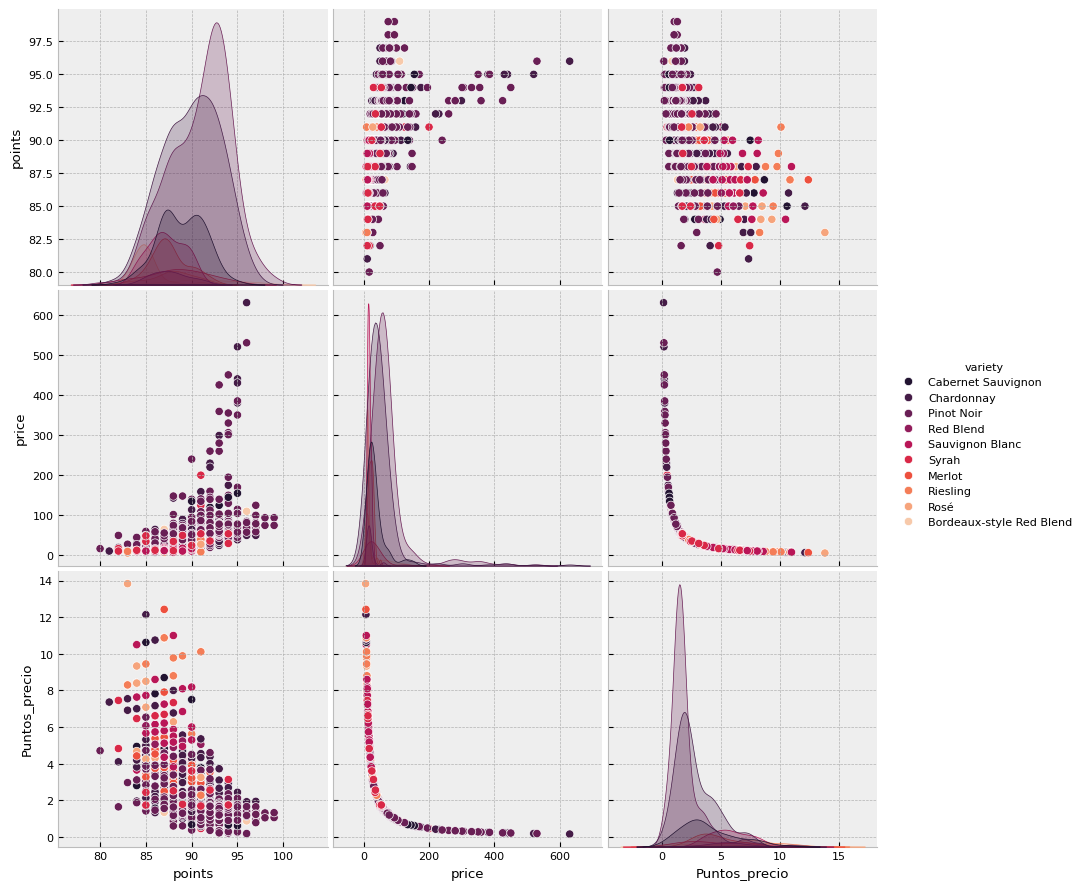

In [ ]:
sns.pairplot(tabla, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en funci√≥n del pa√≠s.

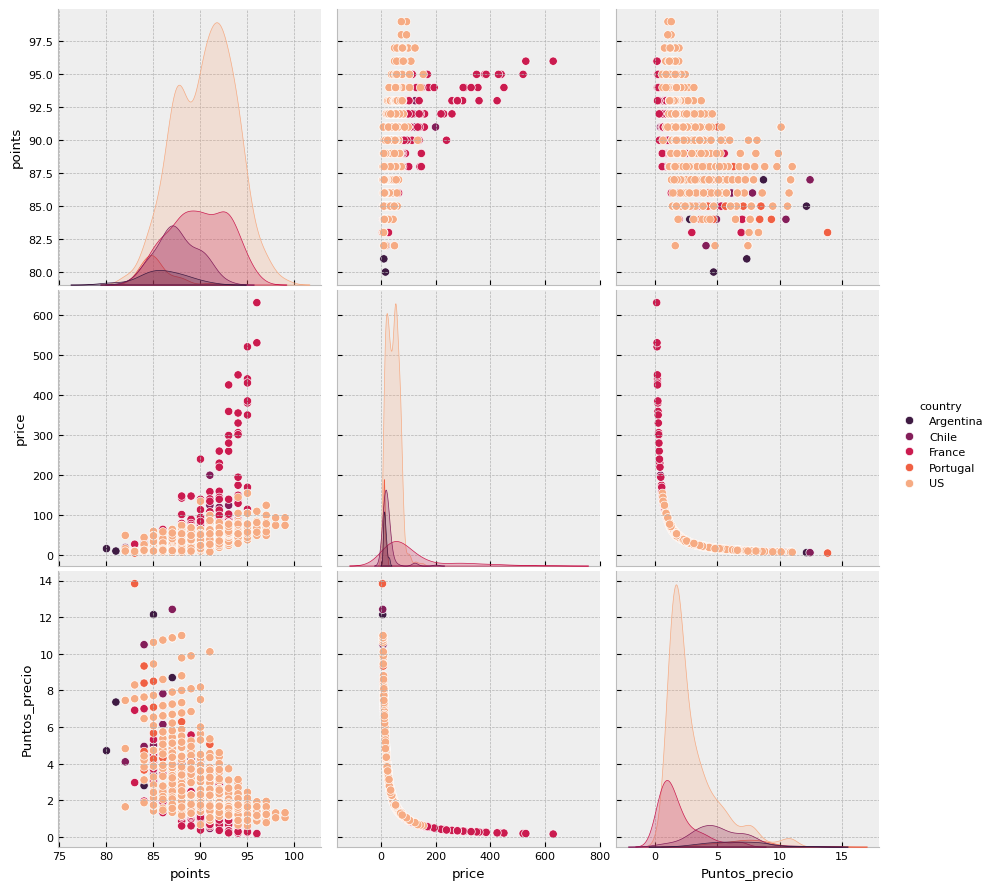

In [ ]:
sns.pairplot(tabla, hue="country",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en funci√≥n de la bodega.

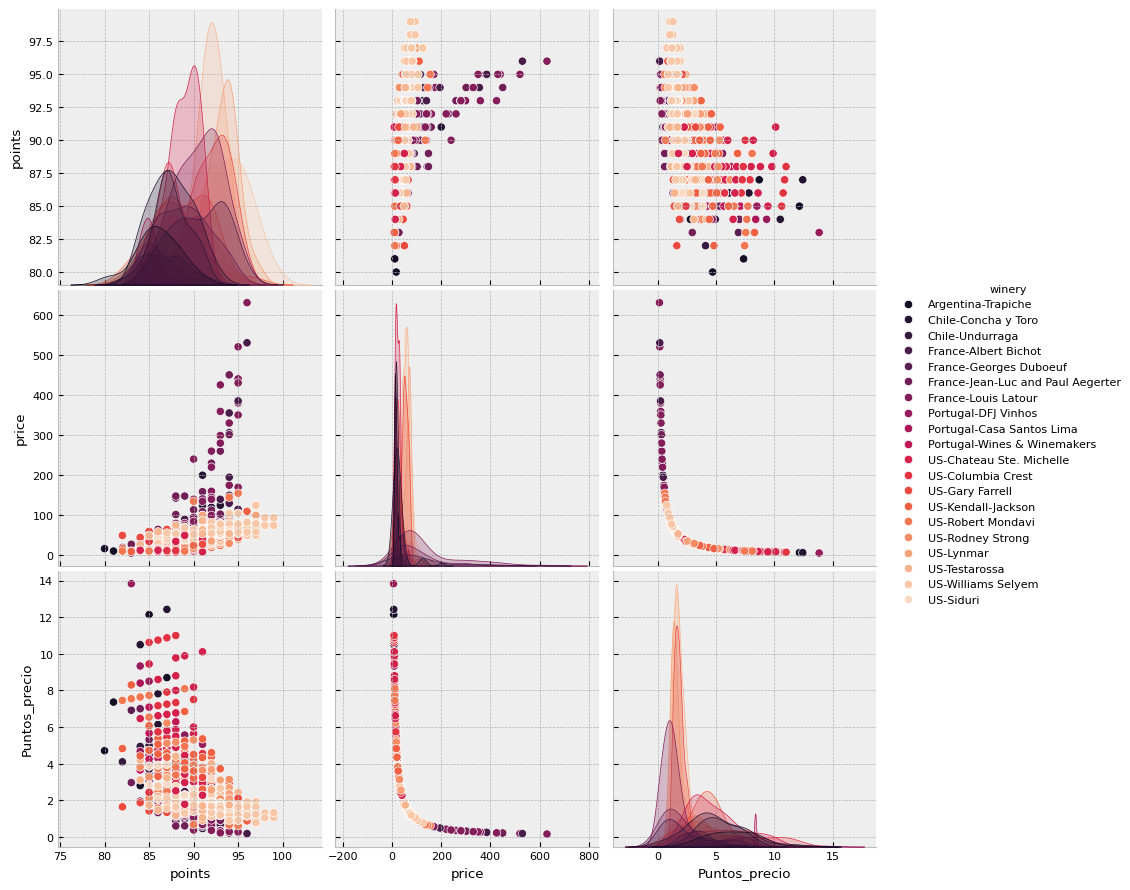

In [ ]:
sns.pairplot(tabla, hue="winery",height=3,palette='rocket')


#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

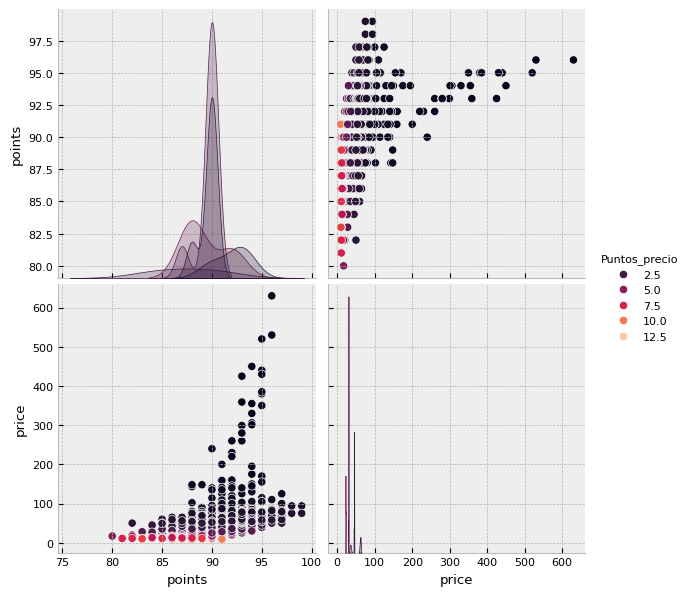

In [ ]:
sns.pairplot(tabla, hue="Puntos_precio",height=3,palette='rocket')



#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

In [ ]:
sns.pairplot(tabla, hue="country",height=3,palette='rocket')


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

In [ ]:
#TU CODIGO


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por pa√≠s.

In [ ]:
#TU CODIGO


### __Agrega los datos de M√©xico a esta √∫ltima tabla de informaci√≥n__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Aseg√∫rate de __no agregar__ la columna de descripci√≥n

In [ ]:
#TU CODIGO
df3 = #<COMPLETA> # nuevo dataFrame que contiene la uni√≥n de las tablas

#### &#9758; Calcula los valores de points/price para los vinos de M√©xico
- TIP: Usa el m√©todo apply sobre `df3[['points','price','points/price']]`

In [ ]:
# TU CODIGO
tabla_completa["puntos_precio2"]=tabla_completa["points"]/tabla_completa["price"]
tabla_completa

#### &#9758; Observa la relaci√≥n puntos-precio por pa√≠s

In [ ]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=tabla_completa)

NameError: name 'df3' is not defined

#### &#9758; Observa las distribuciones por pares en funci√≥n del pa√≠s.
- Construye una tabla auxiliar "mx_top", donde los datos de M√©xico (en df3) aparezcan al final de la tabla mx_top.

In [ ]:
mx_top = #<COMPLETA>
sns.pairplot(mx_top, hue="country",height=3,palette='bright')

SyntaxError: invalid syntax (<ipython-input-121-9f3136fdea60>, line 1)

#### &#9758; Observa las distribuciones (scatter) de puntos por pa√≠s.

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una l√≠nea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre pa√≠s y bodega para calcular primero los valores promedio)

In [ ]:
medias = #<COMPLETA>

# TU CODIGO


#### &#9758; Si consideramos la proporci√≥n de los pa√≠ses con mejor relaci√≥n puntos/precio, ¬øc√≥mo queda M√©xico?
- Usa un gr√°fico de pastel

In [ ]:
# TU CODIGO
